In [1]:
#!pip install wordcloud
#!pip install bnlp_toolkit

In [ ]:
import numpy as np
import pandas as pd
import cv2
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from bnlp.corpus import stopwords, punctuations

In [ ]:
df = dataset = pd.read_excel('new.xlsx')
print(df.columns)
print(df.shape)
df.head()

Index(['Text'], dtype='object')
(76, 1)


,Text
0,মনমরা
1,নতি
2,মন্দা অবস্থা
3,বিষণ্ণতা
4,হতাশা


In [ ]:
def clean(text):
    text = re.sub('[%s]' % re.escape(punctuations), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('\xa0', '', text)
    return text
cleaned_text = df['Text'].apply(lambda x: clean(str(x)))

In [ ]:
refined_sentence = " ".join(cleaned_text)

In [ ]:
def get_mask(img_path):
    img = cv2.imread(img_path, -1)
    if img.shape[2] == 3:
        return img
    return cv2.bitwise_not(img[:, :, 3])

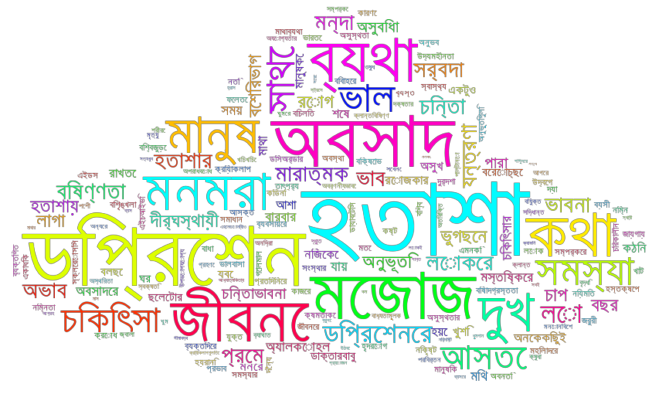

In [ ]:
mask = get_mask("cloud.png")
regex = r"[\u0980-\u09FF]+"
wc = WordCloud(width=800, height=400,mode="RGBA",background_color=None,colormap="hsv",mask=mask,stopwords = stopwords,
font_path="/content/Siyamrupali_1_01.ttf",regexp=regex).generate(refined_sentence)
plt.figure(figsize=(15, 7))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()


result = wc.to_file("Bengali_word_cloud.png")
